### Imports
при подготовке семинара использованы материалы курса "Машинное обучения" от АТП ФИВТ МФТИ

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

-------
<h1 align="center"> Работа с признаками </h1> 
# Предобработка данных
скачайте данные с помощью pd.read_csv по ссылке https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data и уберите заголовок

In [2]:
# Считываем данные
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',)

# Назначаем имена колонок
columns = ('age workclass fnlwgt education educ-num marital-status occupation relationship '
           'race sex capital-gain capital-loss  hours-per-week native-country salary')

df.columns = columns.split() #этот метод разделит датасет по колонкам как в массиве columns

выведите первые 5 записей

In [3]:
 df.head()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


сформируйте новый датафрейм, состоящий из стоблцов 'age, salary'. Подумайте, как можно визуализировать эту информацию при помощи графиков?

In [4]:
new_df = df[['age', 'salary']]

In [5]:
new_df.head()

,age,salary
0,50,<=50K
1,38,<=50K
2,53,<=50K
3,28,<=50K
4,37,<=50K


** Соотношение классов **

In [6]:
df.groupby('salary').count()[['age']]

,age
salary,
<=50K,24719
>50K,7841


### Перекодировка категориальных признаков

Работа с категориальными признаками может быть устроена по разному.

В этой задаче предлагается заменить все уникальные значения таких признаков некоторым числовым значением.

In [7]:
# Подключаем класс для предобработки данных
from sklearn import preprocessing

# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные кат. признаки 
encoded_data.head() 

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [8]:
encoders

{'workclass': LabelEncoder(),
 'education': LabelEncoder(),
 'marital-status': LabelEncoder(),
 'occupation': LabelEncoder(),
 'relationship': LabelEncoder(),
 'race': LabelEncoder(),
 'sex': LabelEncoder(),
 'native-country': LabelEncoder(),
 'salary': LabelEncoder()}

Посмотрим, во что переведены категориальные признаки

In [9]:
df.groupby('marital-status').count()[['age']]

,age
marital-status,
Divorced,4443
Married-AF-spouse,23
Married-civ-spouse,14976
Married-spouse-absent,418
Never-married,10682
Separated,1025
Widowed,993


In [10]:
encoded_data.groupby('marital-status').count()[['age']]

,age
marital-status,
0,4443
1,23
2,14976
3,418
4,10682
5,1025
6,993


In [11]:
df.groupby('workclass').count()[['age']]

,age
workclass,
?,1836
Federal-gov,960
Local-gov,2093
Never-worked,7
Private,22696
Self-emp-inc,1116
Self-emp-not-inc,2541
State-gov,1297
Without-pay,14


In [12]:
encoded_data.groupby('workclass').count()[['age']]

,age
workclass,
0,1836
1,960
2,2093
3,7
4,22696
5,1116
6,2541
7,1297
8,14


### Гистограммы значений
постройте графики гистограмм зависимости различных признаков

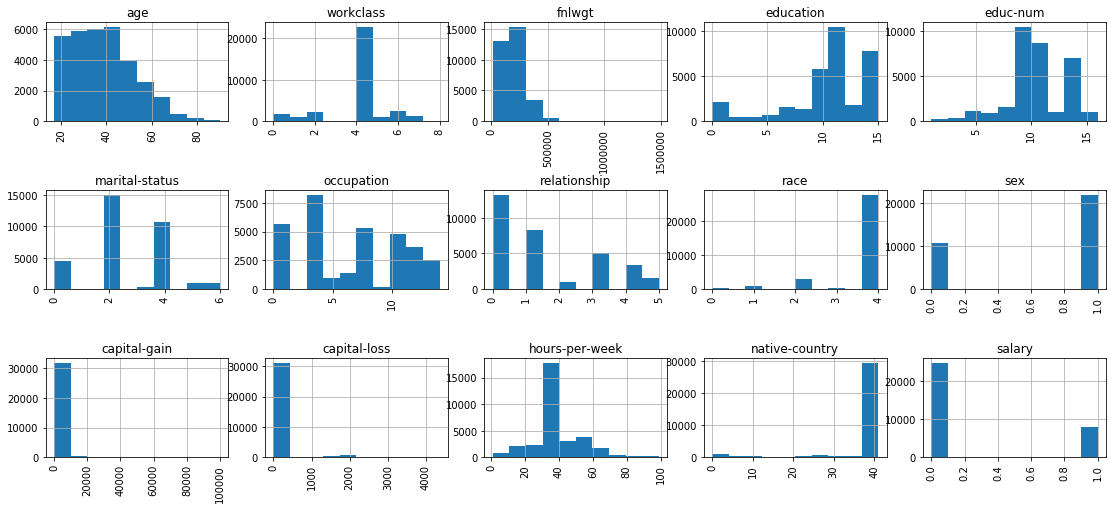

In [13]:
fig = plt.figure(figsize=(19,8))
cols = 5
rows = np.ceil(float(encoded_data.shape[1]) / cols)
for i, column in enumerate(encoded_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_data[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

### Матрица корреляций

По тепловой карте можно посмотреть на зависимости между признаками, а также на зависимости между целевой переменной и признаками. 

Положительная зависимость означает прямую зависимость (чем больше одно, тем меньше другое), отрицательная означает обратное.

Значение близкое к нулю не обязательно означает отсутствие зависимости! Это лишь значит, что между признаками нет прямой (линейной) зависимости

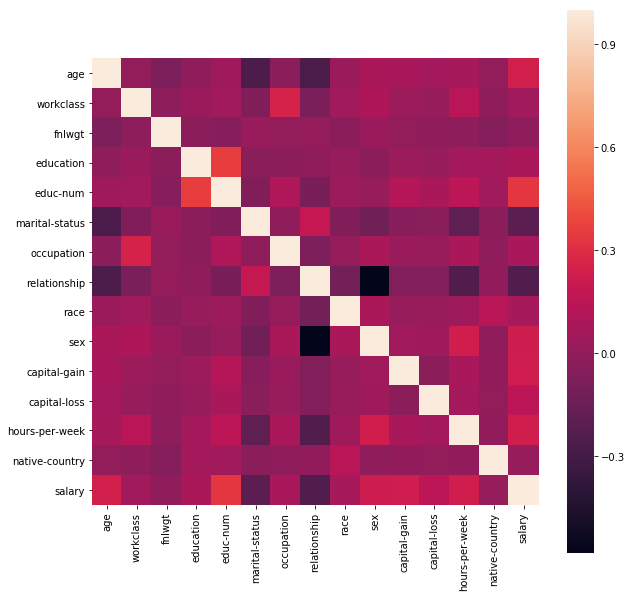

In [14]:
# тоже крутой модуль, для различной визуализации данных
import seaborn as sns

plt.subplots(figsize=(10,10))
encoded_data, encoders = number_encode_features(df)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

** Вопрос: **
    * Почему не всегда хорошо размечать пропуски аналогично известным значениям атрибутов

В данном датасете пропущенные значения обозначены как " ?".  Удалим из выборки все объекты с пропусками.

In [16]:
# удалим все объекты, в которых содержатся пропуски
df = df.dropna()
df.count()

age               32560
workclass         32560
fnlwgt            32560
education         32560
educ-num          32560
marital-status    32560
occupation        32560
relationship      32560
race              32560
sex               32560
capital-gain      32560
capital-loss      32560
hours-per-week    32560
native-country    32560
salary            32560
dtype: int64

** Вопрос: **
    * Почему не всегда правильно использовать перекодированные категориальные признаки (на примере kNN)?
    
** Предобработка данных: **
     - разметка целевой переменной
     - оставляем только числовые признаки

In [17]:
df_prc = df.copy()
df_prc['salary'] = df['salary'].apply((lambda x: x==' >50K')) # Будем предсказывать 1(True), если зарплата больше 50K, 0(False) иначе
df_prc.head()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,False
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,False
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,False
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,False
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,False


In [18]:
# числовые признаки
df._get_numeric_data().columns

Index(['age', 'fnlwgt', 'educ-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [19]:
# Найдём категориальные признаки
Categorical_cols = list(set(df.columns)- set(df._get_numeric_data().columns))

In [20]:
X = np.array(df_prc[df._get_numeric_data().columns])
# y = np.array(df_prc['salary'], dtype='int')
y = encoders['salary'].transform(df['salary']) # применяем наши кодировщики к категориальным фичам

------------------------------
# Масштабирование признаков

** Вопрос** 
* Почему для данного датасета может быть полезно привести все признаки к значениями от 0 до 1, для того чтобы использовать kNN в качестве классификатора? 

В качестве классификатора используем kNN, признаки: число соседей (*n_neighbors*) и метрика (*metrics*).


Подберём оптимальные значения указанных гиперпараметров

In [21]:
# Функция отрисовки графиков

def grid_plot(x, y, x_label, title, y_label='roc_auc'):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

In [22]:
# Будем использовать модель k ближайших соседей
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

### Подбор параметра n_neighbors для KNeighborsClassifier

У алгоритма knn есть один гиперпараметр (то значение, которое мы выставляем руками) -- число соседей на основе которых алгоритм принимает решение.

Как обсуждалось на лекции, подбор подобных параметров можно осуществлять на основе специальной отложенной (тестовой) выборки, а можно с помощью кросс-валидации. (Вспомните, какие плюсы и минусы имеет каждый из подходов)

В данной задаче мы будем использовать кросс-валидацию на 5 фолдах.

In [23]:
# В sklearn есть специальный модуль для работы с кросс-валидацией
from sklearn.model_selection import GridSearchCV

# Зададим сетку - среди каких значений выбирать наилучший параметр.
knn_grid = {'n_neighbors': np.array(np.linspace(2, 100, 10), dtype='int')} # перебираем по параметру <<n_neighbors>>, по сетке заданной np.linspace(2, 100, 10)

# Создаем объект кросс-валидации
gs = GridSearchCV(knn, knn_grid, cv=5)

# Обучаем его
gs.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([  2,  12,  23,  34,  45,  56,  67,  78,  89, 100])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

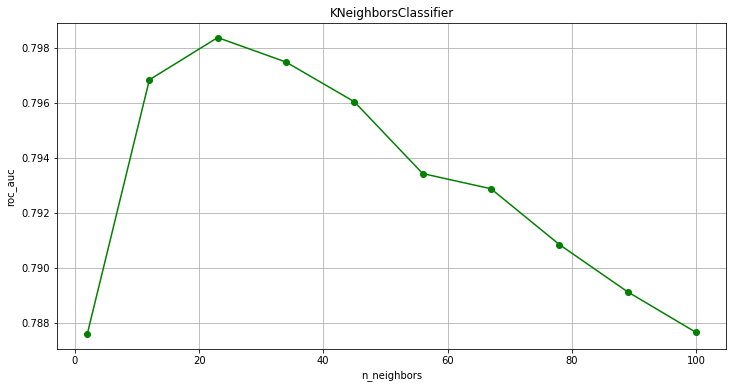

In [24]:
# Строим график зависимости качества от числа соседей
# замечание: результаты обучения хранятся в атрибуте cv_results_ объекта gs

grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

In [25]:
knn_grid = {'n_neighbors': np.array(np.linspace(15, 35, 11), dtype='int')}
gs = GridSearchCV(knn, knn_grid, cv=10)
gs.fit(X, y)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
gs.best_params_, gs.best_score_

({'n_neighbors': 29}, 0.7993550368550368)

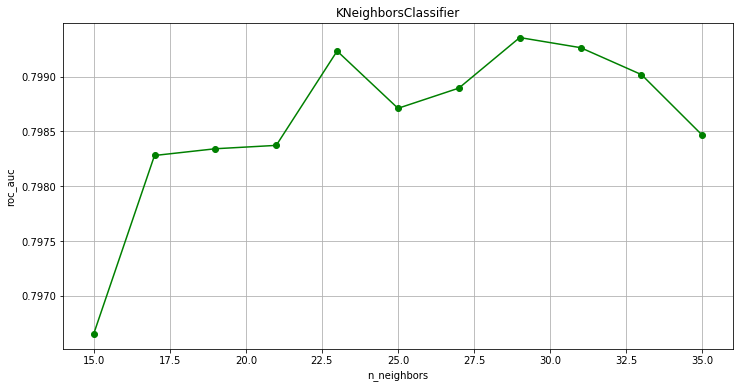

In [26]:
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

Масштабирование признаков можно выполнить, например, одним из следующих способов способами:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

In [27]:
from sklearn.preprocessing import scale
X_scaled = scale(np.array(X, dtype='float'), with_std=True, with_mean=False)

In [28]:
X_scaled

array([[3.66557296, 0.78931753, 5.05311708, 0.        , 0.        ,
        1.05285081],
       [2.78583545, 2.04310556, 3.49831183, 0.        , 0.        ,
        3.23954094],
       [3.88550734, 2.22382878, 2.7209092 , 0.        , 0.        ,
        3.23954094],
       ...,
       [4.25206463, 1.43924842, 3.49831183, 0.        , 0.        ,
        3.23954094],
       [1.6128521 , 1.90898667, 3.49831183, 0.        , 0.        ,
        1.61977047],
       [3.81219588, 2.72792101, 3.49831183, 2.03431427, 0.        ,
        3.23954094]])

### Подборка параметра n_neighbors для KNeighborsClassifier при нормированных признаках

{'n_neighbors': 67} 0.8220823095823095


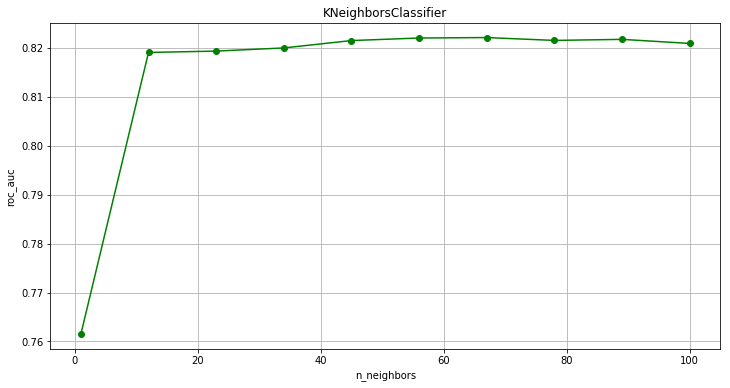

In [29]:
grid = {'n_neighbors': np.array(np.linspace(1, 100, 10), dtype='int')}
gs = GridSearchCV(knn, grid, cv=5, n_jobs=5)
gs.fit(X_scaled, y)
print(gs.best_params_, gs.best_score_)
grid_plot(grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

{'n_neighbors': 59} 0.8229115479115479


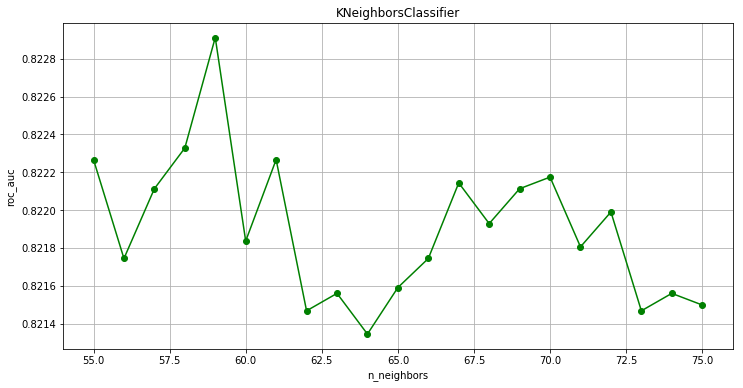

In [31]:
grid = {'n_neighbors': np.array(np.linspace(55, 75, 21), dtype='int')}
gs = GridSearchCV(knn, grid, cv=10, n_jobs=5)
gs.fit(X_scaled, y)
print(gs.best_params_, gs.best_score_)
grid_plot(grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

** Вопрос ** 
 * Увеличилась ли точность классификации после нормировки?

<h1 align="center"> Метрики </h1> 
# Метрики для задачи классификации
### Accuracy

### Поделим выборку на train/test

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_tain, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

### Используем 2 классификаторва 
- умный kNN
- глупый -- DummyClassifier (самый популярный класс)

In [36]:
from sklearn import dummy

knn = KNeighborsClassifier(n_neighbors=29) 
clf_knn = knn.fit(X_train, y_tain)
clf_mp = dummy.DummyClassifier("most_frequent").fit(X_train, y_tain)

In [37]:
y_knn = clf_knn.predict(X_test)
y_mp = clf_mp.predict(X_test)

In [38]:
y_knn

array([0, 0, 0, ..., 0, 1, 0])

In [39]:
y_mp

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
y_test

array([0, 0, 1, ..., 0, 1, 0])

### $$Accuracy = \frac{\sum_{x_i, y_i \in (X, Y)} I(y(x_i) = y_i)}{|(X, Y)|} = \frac{num~right~classified~obj}{num~all~obj}$$

In [42]:
from sklearn import metrics

print ('knn =', metrics.accuracy_score(y_test, y_knn), 'mp =', metrics.accuracy_score(y_test, y_mp))

knn = 0.7957189390414147 mp = 0.7553280595625872


** Вопросы **
* На самом ли деле kNN выдает настолько плохие предсказания?
* Какую использовать метрику точности предсказаний при несбалансированных классах?

### Conf-matrix

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

Text(0.5,42,'Predicted value')

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


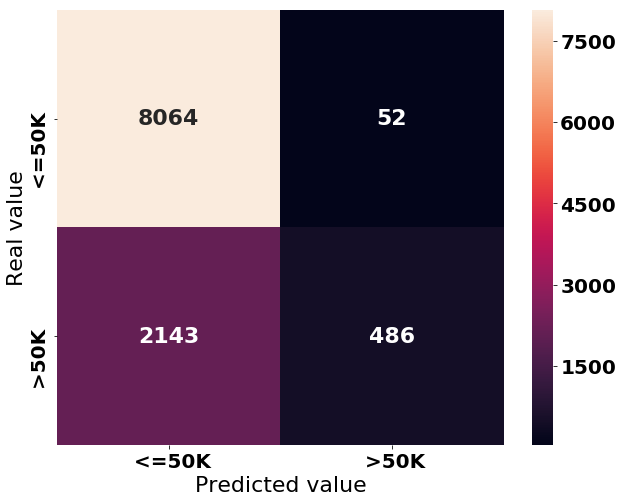

In [44]:
import matplotlib

fig = plt.figure(figsize=(10,8))
nn_mtx = metrics.confusion_matrix(y_test, y_knn)

font = {'family' : 'Calibri', 'weight' : 'bold', 'size'   :22}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.heatmap(nn_mtx, annot=True, fmt="d", 
            xticklabels=encoders["salary"].classes_, 
            yticklabels=encoders["salary"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

Text(0.5,42,'Predicted value')

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


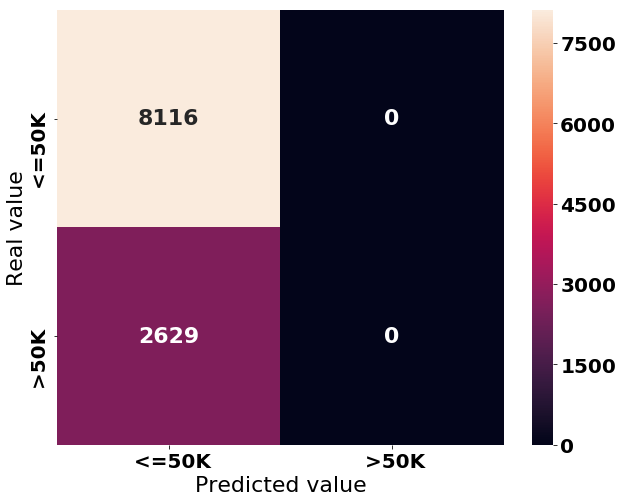

In [45]:
mp_mtx = metrics.confusion_matrix(y_test, y_mp)

font = {'family' : 'Calibri', 'weight' : 'bold', 'size'   :22}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(10,8))
sns.heatmap(mp_mtx, annot=True, fmt="d", 
            xticklabels=encoders["salary"].classes_, 
            yticklabels=encoders["salary"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

### Precision

## $$Precision = \frac{TP}{TP + FP}$$

In [46]:
print ('knn =', metrics.precision_score(y_test, y_knn), 'mp =', metrics.precision_score(y_test, y_mp))

knn = 0.9033457249070632 mp = 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** Вопрос: **
* Приведите пример работы классификатора когда precition большой а классификатор работает плохо?

### Recall

## $$Recall = \frac{TP}{TP + FN}$$

In [47]:
print ('knn =', metrics.recall_score(y_test, y_knn), 'mp =', metrics.recall_score(y_test, y_mp))

knn = 0.18486116394066185 mp = 0.0


** Вопрос: ** 
* Приведите пример работы классификатора когда recall большой а классификатор работает плохо?

### F1

Что важнее, точность или полнота? Какое среднее выбрать?

## $$F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$$

** Вопросы: ** 
* Как взвесить Precision и Recall?
    - Среднее арифметичиское плохо: (p=0.5, r=0.5) должно быть лучше чем (p=1, r=0), 
    - Лучше минимум, но при равной точности должен побеждать классфикатор с большей полнотой
    - Гармоничиское среднее, сглаженный минимум

Text(0,0.5,'Recall')

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


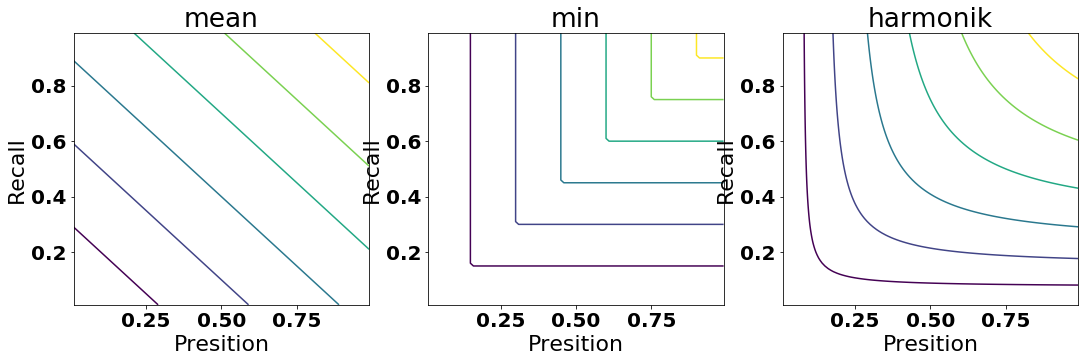

In [49]:
import scipy

fig, axs = plt.subplots(figsize=(18, 5), ncols=3)

x_, y_ = np.arange(0.01, 1, 0.01), np.arange(0.01, 1, 0.01)
X, Y = np.meshgrid(x_, y_)

Z = [[0.5*x + 0.5*y  for x in x_] for y in y_]
axs[0].contour(X, Y, Z)
axs[0].set_title('mean')
axs[0].set_xlabel('Presition')
axs[0].set_ylabel('Recall')

Z = [[min(x, y)  for x in x_] for y in y_]
axs[1].contour(X, Y, Z)
axs[1].set_title('min')
axs[1].set_xlabel('Presition')
axs[1].set_ylabel('Recall')


Z = [[scipy.stats.hmean([x, y])  for x in x_] for y in y_]
axs[2].contour(X, Y, Z)
axs[2].set_title('harmonik')
axs[2].set_xlabel('Presition')
axs[2].set_ylabel('Recall')

In [50]:
print ('knn =', metrics.f1_score(y_test, y_knn), 'mp =', metrics.f1_score(y_test, y_mp))

knn = 0.30691506157246606 mp = 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# <span style="color:orange"> Multiclass Precision-Recall </span>

#### Загрузим датасет с тремя классами

In [51]:
df_iris = sns.load_dataset("iris")
df_iris = df_iris.sample(n=150)

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

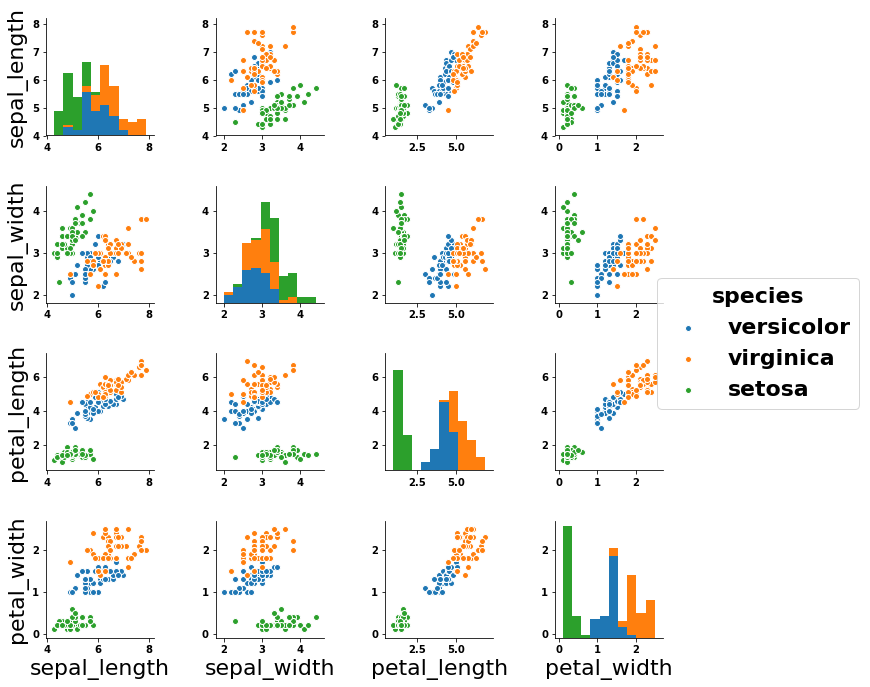

In [52]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
sns.pairplot(df_iris, hue="species")

In [53]:
df_iris, encoders = number_encode_features(df_iris)
iris_X, iris_y = df_iris[df_iris.columns[:-1]].values, df_iris[df_iris.columns[-1]].values

iris_X_train, iris_y_tain = iris_X[:30], iris_y[:30]
iris_X_test, iris_y_test = iris_X[40:], iris_y[40:]

In [54]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
59,5.2,2.7,3.9,1.4,1
92,5.8,2.6,4.0,1.2,1
142,5.8,2.7,5.1,1.9,2
134,6.1,2.6,5.6,1.4,2
50,7.0,3.2,4.7,1.4,1


In [55]:
iris_clf_knn = KNeighborsClassifier().fit(iris_X_train, iris_y_tain)
iris_clf_mp = dummy.DummyClassifier("most_frequent").fit(iris_X_train, iris_y_tain)

In [56]:
iris_y_knn = iris_clf_knn.predict(iris_X_test)
iris_y_mp = iris_clf_mp.predict(iris_X_test)

Пусть выборка состоит из K классов. Рассмотрим K двухклассовых задач, каждая из которых заключается в отделении своего класса от остальных, то есть целевые значения для k-й задаче вычисляются как $y_{ik} = [yi = k]$. Для каждой из них можно вычислить различные характеристики (TP, FP, и т.д.) алгоритма $a_k(x) = [a(x) = k]$.

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

Text(0.5,46,'Predicted value')

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

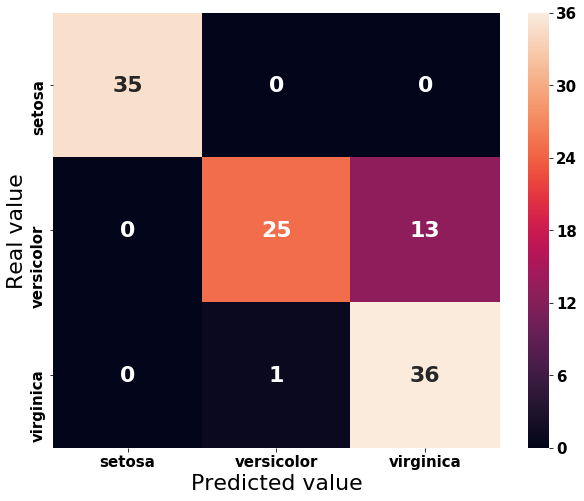

In [57]:
mp_mtx = metrics.confusion_matrix(iris_y_test, iris_y_knn)

fig = plt.figure(figsize=(10,8))
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
sns.heatmap(mp_mtx, annot=True, fmt="d", 
            xticklabels=encoders["species"].classes_, 
            yticklabels=encoders["species"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

**Macro-averaging** -- подсчет TP, FN, TN, FP для каждого класса, а после подсчет точности и полноты.

**Micro-averaging** -- подсчет  точности и полноты для каждого класса, а после подсчет их среденего.

In [58]:
print('для kNN:')
print ('macro = ', metrics.f1_score(iris_y_test, iris_y_knn, average='macro'), ', micro = ', metrics.f1_score(iris_y_test, iris_y_knn, average='micro'))

# 
print('\nдля dummy-classifier:')
iris_y_knn[iris_y_knn==1] = 0
print ('macro = ', metrics.f1_score(iris_y_test, iris_y_knn, average='macro'), ', micro = ', metrics.f1_score(iris_y_test, iris_y_knn, average='micro'))

для kNN:
macro =  0.8728197674418604 , micro =  0.8727272727272727

для dummy-classifier:
macro =  0.522125322997416 , micro =  0.6454545454545455


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# AUC-ROC

In [60]:
clf_knn = KNeighborsClassifier(n_neighbors=29).fit(X_train, y_tain)
clf_mp = dummy.DummyClassifier("most_frequent").fit(X_train, y_tain)

In [61]:
y_knn = clf_knn.predict(X_test)
y_mp = clf_mp.predict(X_test)

ROC AUC = 0.5892


Text(0.5,0,'False Positive Rate')

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

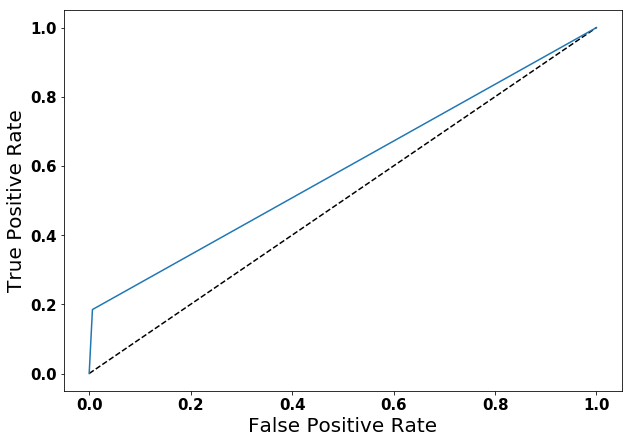

In [64]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_knn)
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(metrics.auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

ROC AUC = 0.5000


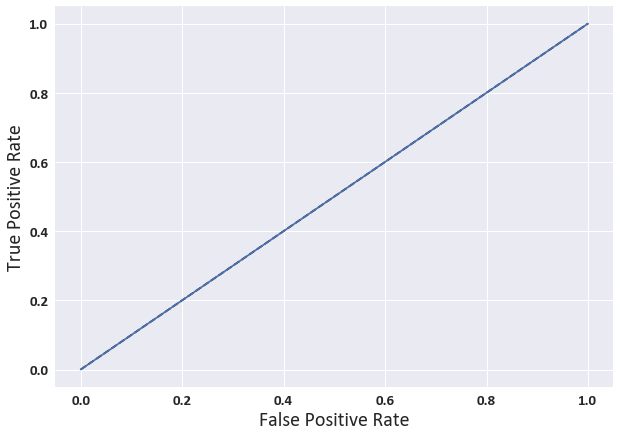

In [89]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_mp)
pylab.figure(figsize=(10, 7))
pylab.plot([0, 1], [0, 1], 'k--')
pylab.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(metrics.auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

** Вопрос **
* Когда AUC большой при плохой работе классификатора?

# PR AUC

PR AUC = 0.3992


/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

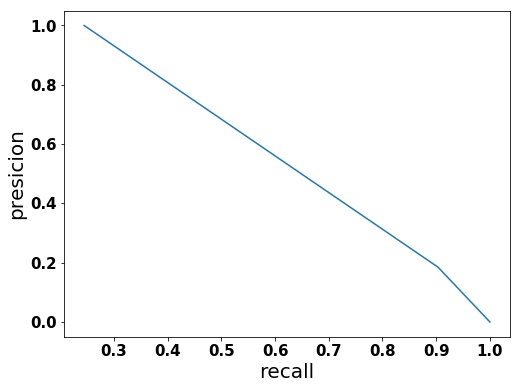

In [65]:
pres, rec, _ = metrics.precision_recall_curve(y_test, y_knn)
plt.figure(figsize=(8, 6))
plt.plot(pres, rec)
plt.ylabel('presicion', fontsize=20)
plt.xlabel('recall', fontsize=20)
print ('PR AUC = {0:.4f}'.format(metrics.auc(pres, rec)))

In [268]:
pres, rec

(array([ 0.2372976 ,  0.2806532 ,  0.3766803 ,  0.55739972,  0.79148311,
         0.9529703 ,  1.        ]),
 array([ 1.        ,  0.79529412,  0.5054902 ,  0.31607843,  0.21137255,
         0.15098039,  0.        ]))

PR AUC = 0.2525


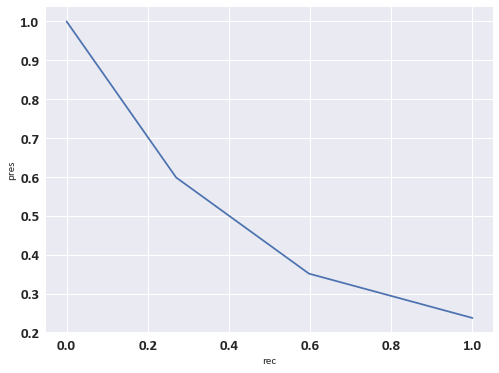

In [270]:
pres, rec, _ = metrics.precision_recall_curve(y_test, y_mp)
pylab.figure(figsize=(8, 6))
pylab.plot(rec, pres)
pylab.ylabel('pres')
pylab.xlabel('rec')
print( 'PR AUC = {0:.4f}'.format(metrics.auc(pres, rec)))

Когда PR кривая не адекватна?

# Метрики для задачи рeгрессии

Data: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [66]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', header=0, sep=';')

In [67]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa11ae78710>,
      dtype=object)

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

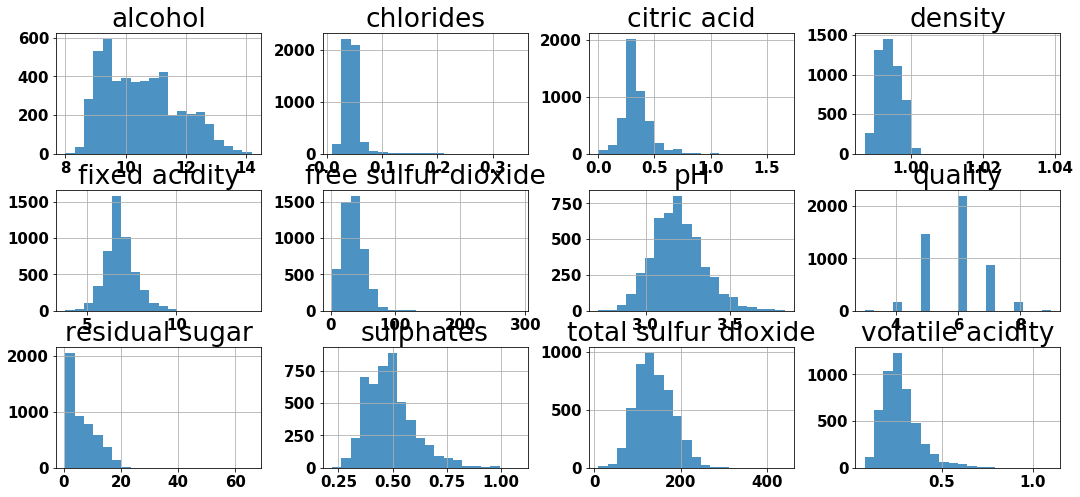

In [69]:
df.hist(figsize=(18, 8), layout=(3,4), bins=20, alpha=0.8)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('quality', axis=1), df.quality, test_size=0.33, random_state=42)

In [71]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3167,5.6,0.28,0.40,6.1,0.034,36.0,118.0,0.99144,3.21,0.43,12.1
324,8.3,0.41,0.51,2.0,0.046,11.0,207.0,0.99300,3.02,0.55,11.4
4731,5.3,0.31,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7
2305,7.0,0.36,0.30,5.0,0.040,40.0,143.0,0.99173,3.33,0.42,12.2
1777,6.5,0.18,0.26,1.4,0.041,40.0,141.0,0.99410,3.34,0.72,9.5


In [72]:
y_train.head()

3167    7
324     5
4731    6
2305    7
1777    6
Name: quality, dtype: int64

In [73]:
print (X_train.shape, X_test.shape)
print (y_train.shape, y_test.shape)

(3281, 11) (1617, 11)
(3281,) (1617,)


In [75]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
# Create dummy regression object
d_regr = dummy.DummyRegressor(strategy='mean')

# Train the model using the training sets
d_regr.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [77]:
predictions = regr.predict(X_test)

In [78]:
d_predictions = d_regr.predict(X_test)

In [79]:
print (predictions.shape, '\t', predictions[0:5])

(1617,) 	 [6.37886848 6.3994996  6.40362171 5.82459689 6.45383134]


In [80]:
print (d_predictions.shape, '\t', d_predictions[0:5])

(1617,) 	 [5.86863761 5.86863761 5.86863761 5.86863761 5.86863761]


(array([0.00944673, 0.01417009, 0.00944673, 0.02834018, 0.04251027,
        0.03306354, 0.04723363, 0.12280745, 0.12280745, 0.11808409,
        0.13225418, 0.18893454, 0.27395508, 0.35425226, 0.45816626,
        0.42510271, 0.46761298, 0.50067653, 0.48178307, 0.55735689,
        0.63765407, 0.5431868 , 0.54791016, 0.42982608, 0.34008217,
        0.23616817, 0.1417009 , 0.08502054, 0.07557382, 0.03778691,
        0.04723363, 0.01889345, 0.02834018, 0.02361682, 0.01417009,
        0.00472336, 0.01417009, 0.00472336, 0.        , 0.        ,
        0.        , 0.00472336, 0.        , 0.00472336, 0.00472336,
        0.        , 0.        , 0.        , 0.        , 0.00472336]),
 array([-2.45820085, -2.32727102, -2.19634119, -2.06541135, -1.93448152,
        -1.80355169, -1.67262186, -1.54169202, -1.41076219, -1.27983236,
        -1.14890252, -1.01797269, -0.88704286, -0.75611303, -0.62518319,
        -0.49425336, -0.36332353, -0.23239369, -0.10146386,  0.02946597,
         0.1603958 ,  0.29

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  

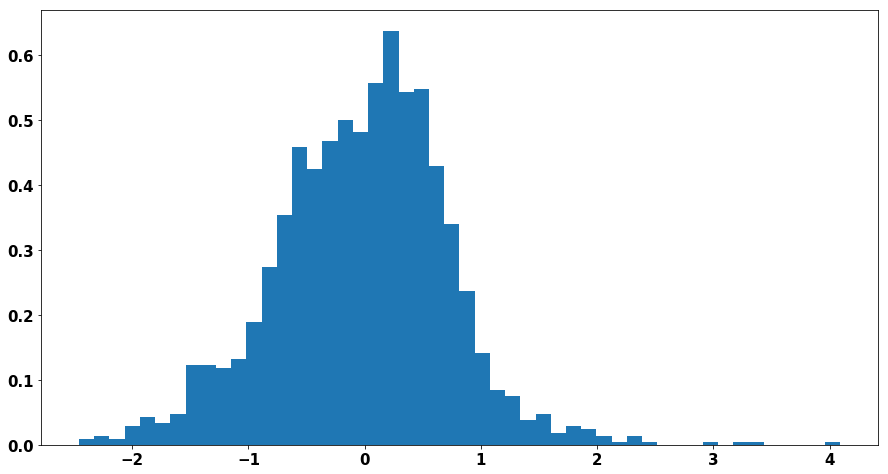

In [82]:
rem = predictions - y_test
plt.figure(figsize=(15, 8))
plt.hist(rem, bins=50, normed=True)

### Mean Square Error 

## $$ MSE(y, \hat y) = \frac{1}{n_{samples}} \sum_{i=1}^{n_{samples}} ( y_i - \hat y_i )^2 $$

In [111]:
mse = metrics.mean_squared_error(y_test, predictions)
d_mse = metrics.mean_squared_error(y_test, d_predictions)

print ("MSE,  LR = {0:.4}, Dummy = {1:0.4}".format(mse, d_mse))

MSE,  LR = 0.5576, Dummy = 0.7638


In [112]:
rmse = np.sqrt(mse)
d_rmse = np.sqrt(d_mse)

print( "RMSE / LR = {0:.4}, Dummy = {1:0.4}".format(rmse, d_rmse))

RMSE / LR = 0.7467, Dummy = 0.8739


### Mean Absolute Error 

## $$ MAE(y, \hat y) = \frac{1}{n_{samples}} \sum_{i=1}^{n_{samples}} | y_i - \hat y_i | $$

In [113]:
mae = metrics.mean_absolute_error(y_test, predictions)
d_mae = metrics.mean_absolute_error(y_test, d_predictions)

print( "MAE / LR = {0:.4}, Dummy = {1:0.4}".format(mae, d_mae))

MAE / LR = 0.5806, Dummy = 0.6663


### Median Absolute Error 

## $$ MedAE(y, \hat y) = median( | y_1 - \hat y_1 |, ..., | y_n - \hat y_n | ) $$

In [115]:
medae = metrics.median_absolute_error(y_test, predictions)
d_medae = metrics.median_absolute_error(y_test, d_predictions)

print ("MedAE / LR = {0:.4}, Dummy = {1:0.4}".format(medae, d_medae))

MedAE / LR = 0.481, Dummy = 0.8686


### R² score, the coefficient of determination

## $$ R^2(y, \hat y) = 1 -  \frac{\sum_{i=1}^{n_{samples}} ( y_i - \hat y_i )^2}{\sum_{i=1}^{n_{samples}} {( y_i - \bar y_i )^2}} $$

## $ \bar y = \frac{1}{n_{samples}} \sum_{i=1}^{n_{samples}} y_i $

In [117]:
r2 = metrics.r2_score(y_test, predictions)
d_r2 = metrics.r2_score(y_test, d_predictions)

print ("R2 score / LR = {0:.4}, Dummy = {1:0.4}".format(r2, d_r2))

R2 score / LR = 0.2692, Dummy = -0.001034


<b>Как интерпретировать MSE, RMSE, MAE, MedAE?</b>

# Интепретация метрик с вероятностной точки зрения

#### Функционал среднего риска
$$R(a) = \sum\limits_{X}\sum\limits_{Y}\lambda_{ya(x)}P\left(y|x\right)p(x)dx=\int\limits_{X}\sum\limits_{Y}\lambda_{ya(x)}P\left(y|x\right)p(x)dx $$
* paragraph 2.1 http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf

** Задача 1** 
<img src='img/Task2.png'>

** Задача 2** 
<img src='img/Task3.png'>

<h1 align="center"> Bias-Variance TradeOff </h1> 
# Проблема переобучения

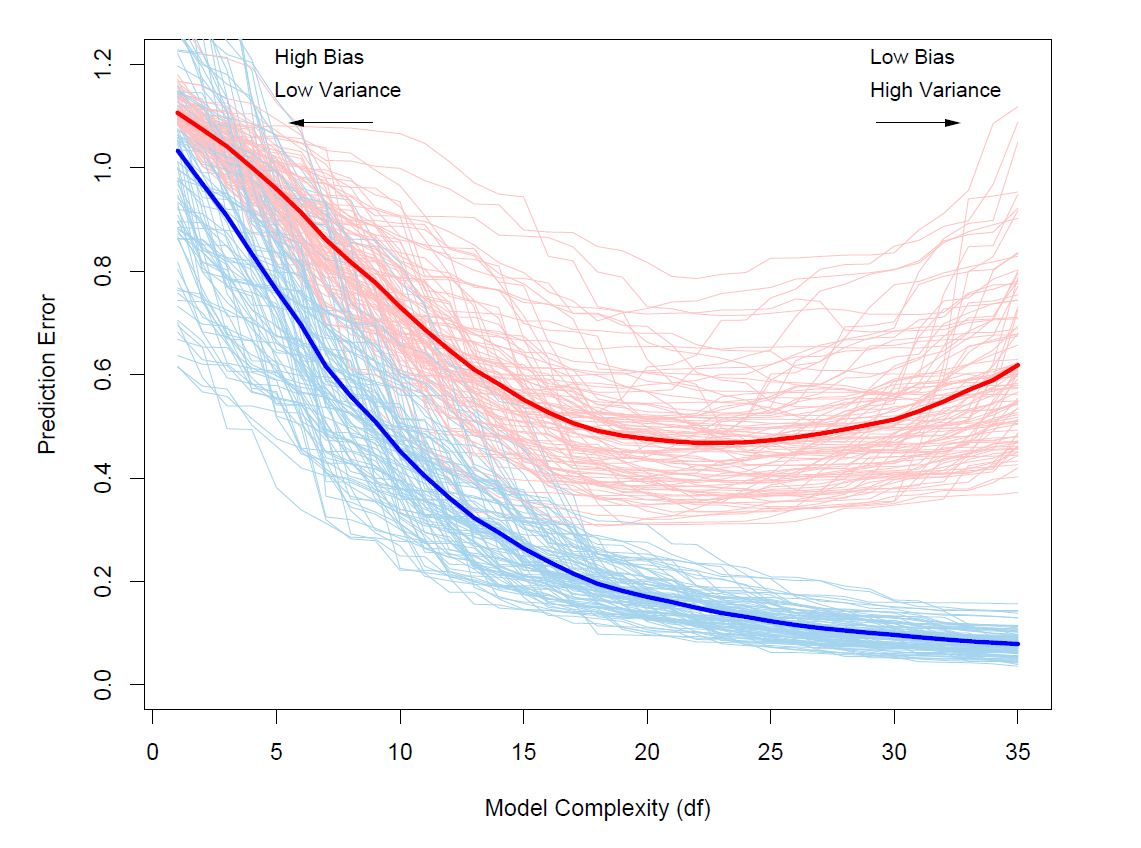

In [51]:
# Overfitting 
Image('pic/CV.jpg', width=700, height=500)

<span style='color: blue, font-size=12pt'> Learing Sample = Train Set = Обучающая выборка </span>  VS
<span style='color: red, font-size=12pt'> Validation Sample = Validation Set = Контрольная выборка </span>

<span style='color: green, font-size=12pt'> Переобучение - это явление (эффект), связанное с тем, что с ростом сложности семейства алгоритмов будет ухудшаться (с некоторого момента), точность на контрольной выборке.</span>

** Вопросы **
 * В чём причина переобучения?
 * Можно ли ожидать, что с ростом сложности модели ошибка на контрольной (велидационной) выборке будет только расти (неуменьшаться)?

# Идея разложения ошибки на bias и variance

** Bias Variance Idea **
   * Given a model $a_{LS}$ built from learning sample $LS$.
    - Its generalization error (useful for model assessment):
$$ Err_{LS}=E_{X,Y}\{\mathcal L(y, a_{LS})\}$$

   * Given a learning algorithm $\mu$ trained on $LS$ of size $\ell$
     - Its error (useful to describe learning algorithm):
    $E_{LS} {Err_{LS} }=E_{LS} \left\{E_{X,Y}\{\mathcal L(y, a_{LS})\}\right\}$

<img src='img/BVIdea.jpg', Width=600>

## БЮВывод для регрессии при квадратичной функции потерь  
* simple regression model $Err_{LS} = E_y \left\{(y-\hat{y})^2\right\}$:
* a good algorithm should minimize an error not only on one $LS$, but in average over all $LS$ of size $\ell$:

\begin{equation}
    \begin{split}
        &  E_{LS} \left\{E_{Y}\{(y - \hat{y})^2\}\right\} = E_{LS} \left\{E_{Y}\{(y - E_Y\{y\} + E_Y\{y\} - \hat{y})^2\}\right\} = \\
          = & E_{LS} \left\{E_{Y}\{(y - E_Y\{y\})^2\}\right\} + E_{LS} \left\{E_{Y}\{(E_Y\{y\} - \hat{y})^2\}\right\}+
        2 E_{LS} \left\{E_{Y}\{(y - E_Y\{y\}) (E_Y\{y\} - \hat{y})\}\right\} = \\
          = & E_{Y}\{(y - E_Y\{y\})^2\} + E_{LS} \left\{(E_Y\{y\} - \hat{y})^2\right\}
        + 2 E_{LS} \left\{E_{Y}\{(y - E_Y\{y\}) (E_Y\{y\} - \hat{y})\}\right\} =\\
         & = \color{red}{\underbrace{E_{Y}\{(y - E_Y\{y\})^2\}}_{var_Y\{y\}}} +\color{black}{E_{LS} \left\{(E_Y\{y\} - \hat{y})^2\right\}}
    \end{split}
\end{equation}

\begin{equation}
    \begin{split}
        & E_{LS} \left\{(E_Y\{y\} - \hat{y})^2\right\} = E_{LS} \left\{(E_Y\{y\} - E_{LS}\{\hat{y}\} + E_{LS}\{\hat{y}\} - \hat{y})^2\right\} = \\
        & =E_{LS} \left\{(E_Y\{y\} - E_{LS}\{\hat{y}\})^2\right\} + E_{LS} \left\{(E_{LS}\{\hat{y}\} - \hat{y})^2\right\}
         + E_{LS} \left\{2 (E_Y\{y\} - E_{LS}\{\hat{y}\})(E_{LS}\{\hat{y}\} - \hat{y})\right\} = \\
        & =(E_Y\{y\} - E_{LS}\{\hat{y}\})^2 + E_{LS} \left\{(\hat{y}-E_{LS}\{\hat{y}\})^2\right\} + 2 (E_Y\{y\} - E_{LS}\{\hat{y}\})(E_{LS}\{\hat{y}\} - E_{LS}\{\hat{y}\}) = \\
        & = \color{red}{\underbrace{(E_Y\{y\} - E_{LS}\{\hat{y}\})^2 }_{bias^2}}+ \color{red}{\underbrace{E_{LS} \left\{(\hat{y}-E_{LS}\{\hat{y}\})^2\right\}}_{variance}}
    \end{split}
\end{equation}

* более полная версия для регрессии и knn: https://github.com/ml-mipt/ml-mipt-part1/blob/master/2017/seminars/03-pandas/bias_variance.pdf

** Задача **:
Предсказать средний рост группы 59x , которая поступит на физтех в 2025 году, зная рост всех 59x групп прошлых лет. 

Решение: используется 2 модели

## 1) $$\hat{y}=\frac{1}{l}\sum_{i=1}^l y_i$$
## 2) $$\hat{y}=\frac{\lambda\cdot 180+\sum_{i=1}^l y_i}{\lambda+l}$$

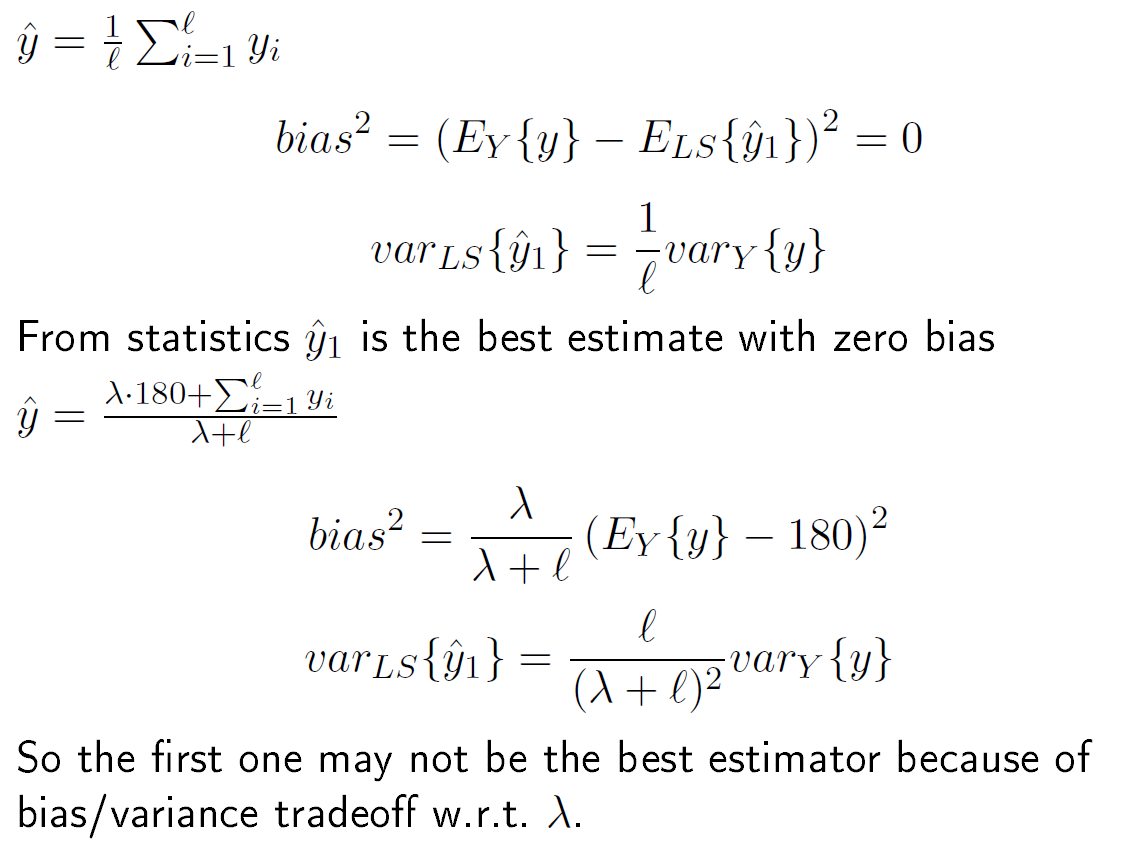

In [62]:
Image('pic/BiasVarianceExample.png', width=500, height=500)

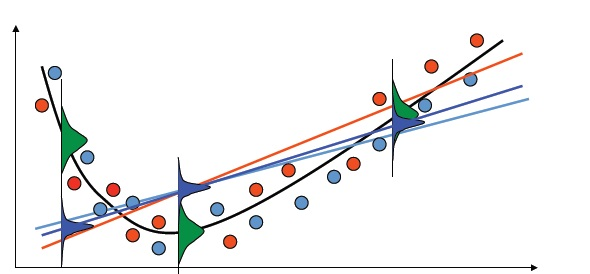

In [63]:
# Underfitting via Bias-Variance approach
Image('pic/Underfitting.jpg')

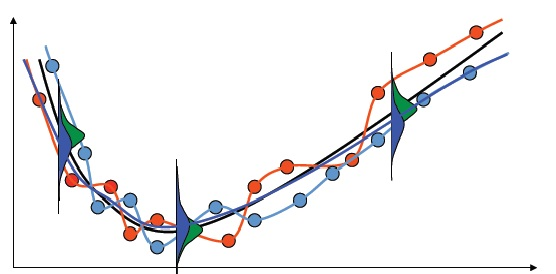

In [65]:
# Overfitting via Bias-Variance approach
Image('pic/Overfitting1.jpg')

------------------------------------
# Bias и Variance

**Bias-Variance ** в зависимости от сложности модели 
<img src='img/BiasVariance.jpg' Width=500>

* ** для kNN** в зависимости от $k$

<img src='img/BV_knn.png', width=500, height=500>


* ** для LR ** в зависимости от размера выборки 
<img src='img/BV_LR.png', width=700, height=700>